In [42]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
from tensorflow import keras

In [48]:
print(tf.__version__)

2.0.0


In [6]:
mnist = keras.datasets.fashion_mnist

In [7]:
type(mnist)

module

In [8]:
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [10]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [12]:
print(xtrain)
np.max(xtrain)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


255

In [13]:
np.mean(xtrain)

72.94035223214286

In [14]:
classname=['TOP','TROUSE','PULLOVER','DRESS','COAT','SANDAL','SHIRT','SNEAKERS','BAGS','ANKLEBOOT']

# DATA EXPLORE 

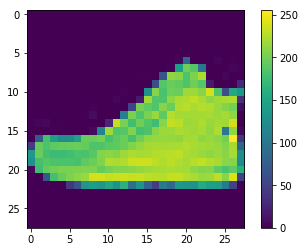

In [20]:
plt.figure()
plt.imshow(xtrain[107])
plt.colorbar()

In [21]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
xtrain = xtrain/255.0

In [23]:
xtest=xtest/255.0

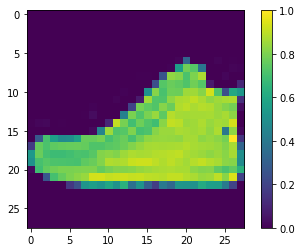

In [24]:
plt.figure()
plt.imshow(xtrain[107])
plt.colorbar()

# Now Build a Model with TF 2.0

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense

In [27]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(xtrain , ytrain , epochs = 10) 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.4952 - accuracy: 0.8246
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3754 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3374 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3143 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2956 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2806 - accuracy: 0.8952
Epoch 7/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2667 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2576 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2475 - accuracy: 0.9073
Epoc

In [57]:
test_loss, test_acc = model.evaluate(xtrain,ytrain)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [58]:
print(test_acc)

0.9155167


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
y_pred = model.predict_classes(xtest)

In [64]:
accuracy_score(ytest, y_pred)

0.8813

In [65]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [62]:
pred = model.predict(xtest)

In [63]:
pred

array([[9.1721638e-08, 6.0618344e-10, 1.6358864e-06, ..., 3.9869626e-03,
        6.3450254e-09, 8.4457308e-01],
       [4.7984499e-06, 3.0477623e-12, 9.9910349e-01, ..., 6.2781722e-20,
        3.7464261e-11, 3.0103090e-11],
       [1.6647759e-09, 1.0000000e+00, 1.5090978e-12, ..., 3.0610902e-29,
        3.2892878e-13, 9.3802750e-23],
       ...,
       [3.1805314e-06, 6.0691108e-10, 8.5164834e-07, ..., 2.3169229e-09,
        9.9992967e-01, 2.6153699e-14],
       [1.2431994e-07, 9.9999082e-01, 4.3098076e-09, ..., 3.7520561e-19,
        7.0707329e-10, 1.0587190e-13],
       [2.6178411e-06, 1.9507555e-10, 1.9052086e-06, ..., 4.4266493e-05,
        2.1607512e-07, 5.7830550e-07]], dtype=float32)

In [66]:
np.argmax(pred[0])

9